[View in Colaboratory](https://colab.research.google.com/github/gauravbansal98/Autoencoders-on-MNIST-dataset/blob/master/Using_single_Dense_layer.ipynb)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("drive/Autoencoders on MNIST dataset", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting drive/Autoencoders on MNIST dataset/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting drive/Autoencoders on MNIST dataset/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting drive/Autoencoders on MNIST dataset/t10k-images-idx3-ubyte.gz
Extracting drive/Autoencoders on MNIST dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
os.chdir('/content')
!git clone https://github.com/mixuala/colab_utils
import colab_utils.tboard
ROOT = %pwd
print(ROOT)
LOG_DIR = os.path.join(ROOT, 'gaurav')
print(LOG_DIR)
colab_utils.tboard.launch_tensorboard( bin_dir=ROOT, log_dir=LOG_DIR )

fatal: destination path 'colab_utils' already exists and is not an empty directory.
/content
/content/gaurav
ngrok installed
status: tensorboard=True, ngrok=True
tensorboard url= https://e27b64b4.ngrok.io


'https://e27b64b4.ngrok.io'

In [0]:
batch_size = 128
hm_epochs = 10
x = tf.placeholder(dtype = tf.float32, shape = [None, 784], name = 'input_lable')
learning_rate = tf.placeholder('float')

In [0]:
def encoder(x):
  with tf.name_scope('encoder_network'):
    a1 = tf.layers.dense(x, 32, activation = tf.nn.relu)   #can also use tf.nn.sigmoid
    return a1   

In [0]:
def decoder(encoder_output):
  with tf.name_scope('decoder_network'):
    z1 = tf.layers.dense(encoder_output, 784, activation = tf.nn.sigmoid)
    return z1

In [0]:
encoder_output = encoder(x)
prediction = decoder(encoder_output)

with tf.name_scope('cost'):
  cost = tf.reduce_mean(tf.pow(prediction-x, 2))
summary = tf.summary.scalar('total_cost_of_batch', cost)

with tf.name_scope('optimizer'):
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

merged = tf.summary.merge_all()

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_writer = tf.summary.FileWriter('./gaurav',sess.graph)
k = 0

In [37]:
batch_size = 128
for i in range(50):
  epoch_loss = 0
  for j in range(int(mnist.train.num_examples/batch_size)):
    epoch_x, epoch_y = mnist.train.next_batch(batch_size)
    epoch_x = epoch_x.reshape((-1, 784))
    o, c, m = sess.run([optimizer, cost, merged], feed_dict = {x : epoch_x, learning_rate : .01})
    epoch_loss += c
    train_writer.add_summary(m, k)
    k += 1
  print('epoch' , i, 'completed out of ', hm_epochs, 'loss ', epoch_loss)

epoch 0 completed out of  10 loss  15.440596355125308
epoch 1 completed out of  10 loss  9.384962925687432
epoch 2 completed out of  10 loss  8.592185018584132
epoch 3 completed out of  10 loss  8.260806323960423
epoch 4 completed out of  10 loss  8.074451988562942
epoch 5 completed out of  10 loss  7.993576880544424
epoch 6 completed out of  10 loss  7.910803809762001
epoch 7 completed out of  10 loss  7.833170312456787
epoch 8 completed out of  10 loss  7.796313501894474
epoch 9 completed out of  10 loss  7.737733127549291
epoch 10 completed out of  10 loss  7.737962490878999
epoch 11 completed out of  10 loss  7.67079905141145
epoch 12 completed out of  10 loss  7.720523709431291
epoch 13 completed out of  10 loss  7.6514463340863585
epoch 14 completed out of  10 loss  7.663576293736696
epoch 15 completed out of  10 loss  7.607575273141265
epoch 16 completed out of  10 loss  7.60692953504622
epoch 17 completed out of  10 loss  7.608260669745505
epoch 18 completed out of  10 loss  7.

In [0]:
x_test = mnist.test.images
decoded_imgs = sess.run(prediction, feed_dict = {x : x_test})

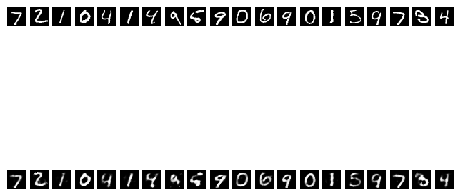

In [39]:
import matplotlib.pyplot as plt
n = 20
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

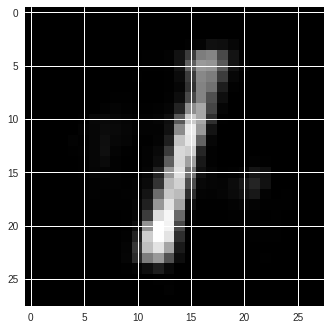

In [40]:
plt.imshow(decoded_imgs[2].reshape(28, 28))

**using two fully connected layers**

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.440772
Step 1000: Minibatch Loss: 0.137554
Step 2000: Minibatch Loss: 0.129695
Step 3000: Minibatch Loss: 0.118785
Step 4000: Minibatch Loss: 0.113224
Step 5000: Minibatch Loss: 0.105161
Step 6000: Minibatch Loss: 0.102819
Step 7000: Minibatch Loss: 0.096309
Step 8000: Minibatch Loss: 0.093118
Step 9000: Minibatch Loss: 0.088559
Step 10000: Minibatch Loss: 0.085313
Step 11000: Minibatch Loss: 0.083156
Step 12000: Minibatch Loss: 0.085475
Step 13000: Minibatch Loss: 0.079599
Step 14000: Minibatch Loss: 0.077255
Step 15000: Minibatch Loss: 0.076990
Step 16000: Minibatch Loss: 0.075890
Step 17000: Minibatch Loss: 0.071552
Step 18000: Minibatch Loss: 0.071367
Step 19000: Minibatch Loss: 0.070421
Step 20000: Minibatch Loss: 0.070033
Step 21000: Minibatch Loss: 0.070113
Step 2200

Step 68000: Minibatch Loss: 0.032004
Step 69000: Minibatch Loss: 0.032821
Step 70000: Minibatch Loss: 0.032185
Step 71000: Minibatch Loss: 0.033491
Step 72000: Minibatch Loss: 0.031440
Step 73000: Minibatch Loss: 0.032686
Step 74000: Minibatch Loss: 0.031830
Step 75000: Minibatch Loss: 0.030751
Step 76000: Minibatch Loss: 0.031578
Step 77000: Minibatch Loss: 0.031089
Step 78000: Minibatch Loss: 0.030223
Step 79000: Minibatch Loss: 0.032242
Step 80000: Minibatch Loss: 0.031171
Step 81000: Minibatch Loss: 0.030602
Step 82000: Minibatch Loss: 0.030393
Step 83000: Minibatch Loss: 0.030513
Step 84000: Minibatch Loss: 0.029761
Step 85000: Minibatch Loss: 0.028192
Step 86000: Minibatch Loss: 0.028253
Step 87000: Minibatch Loss: 0.026582
Step 88000: Minibatch Loss: 0.026096
Step 89000: Minibatch Loss: 0.026411
Step 90000: Minibatch Loss: 0.026811
Step 91000: Minibatch Loss: 0.026457
Step 92000: Minibatch Loss: 0.025555
Step 93000: Minibatch Loss: 0.027145
Step 94000: Minibatch Loss: 0.026224
S

Step 140000: Minibatch Loss: 0.017243
Step 141000: Minibatch Loss: 0.018178
Step 142000: Minibatch Loss: 0.018450
Step 143000: Minibatch Loss: 0.018675
Step 144000: Minibatch Loss: 0.018545
Step 145000: Minibatch Loss: 0.017065
Step 146000: Minibatch Loss: 0.018012
Step 147000: Minibatch Loss: 0.017183
Step 148000: Minibatch Loss: 0.017753
Step 149000: Minibatch Loss: 0.018422
Step 150000: Minibatch Loss: 0.016773
Step 151000: Minibatch Loss: 0.016866
Step 152000: Minibatch Loss: 0.017296
Step 153000: Minibatch Loss: 0.016617
Step 154000: Minibatch Loss: 0.016686
Step 155000: Minibatch Loss: 0.017610
Step 156000: Minibatch Loss: 0.017417
Step 157000: Minibatch Loss: 0.017089
Step 158000: Minibatch Loss: 0.016543
Step 159000: Minibatch Loss: 0.017156
Step 160000: Minibatch Loss: 0.017671
Step 161000: Minibatch Loss: 0.016445
Step 162000: Minibatch Loss: 0.016235
Step 163000: Minibatch Loss: 0.016163
Step 164000: Minibatch Loss: 0.014958
Step 165000: Minibatch Loss: 0.017010
Step 166000:

Step 212000: Minibatch Loss: 0.013612
Step 213000: Minibatch Loss: 0.013465
Step 214000: Minibatch Loss: 0.013871
Step 215000: Minibatch Loss: 0.013244
Step 216000: Minibatch Loss: 0.013389
Step 217000: Minibatch Loss: 0.013032
Step 218000: Minibatch Loss: 0.013698
Step 219000: Minibatch Loss: 0.012854
Step 220000: Minibatch Loss: 0.013855
Step 221000: Minibatch Loss: 0.013671
Step 222000: Minibatch Loss: 0.014792
Step 223000: Minibatch Loss: 0.014085
Step 224000: Minibatch Loss: 0.013724
Step 225000: Minibatch Loss: 0.013682
Step 226000: Minibatch Loss: 0.012652
Step 227000: Minibatch Loss: 0.013886
Step 228000: Minibatch Loss: 0.012425
Step 229000: Minibatch Loss: 0.013183
Step 230000: Minibatch Loss: 0.011960
Step 231000: Minibatch Loss: 0.012332
Step 232000: Minibatch Loss: 0.011478
Step 233000: Minibatch Loss: 0.011584
Step 234000: Minibatch Loss: 0.012105
Step 235000: Minibatch Loss: 0.012183
Step 236000: Minibatch Loss: 0.012989
Step 237000: Minibatch Loss: 0.012430
Step 238000:

Step 284000: Minibatch Loss: 0.012414
Step 285000: Minibatch Loss: 0.010368
Step 286000: Minibatch Loss: 0.010153
Step 287000: Minibatch Loss: 0.010080
Step 288000: Minibatch Loss: 0.011118
Step 289000: Minibatch Loss: 0.011073
Step 290000: Minibatch Loss: 0.010884
Step 291000: Minibatch Loss: 0.011158
Step 292000: Minibatch Loss: 0.011050
Step 293000: Minibatch Loss: 0.010273
Step 294000: Minibatch Loss: 0.011166
Step 295000: Minibatch Loss: 0.011094
Step 296000: Minibatch Loss: 0.010558
Step 297000: Minibatch Loss: 0.011947
Step 298000: Minibatch Loss: 0.010527
Step 299000: Minibatch Loss: 0.011251
Step 300000: Minibatch Loss: 0.010175
Original Images


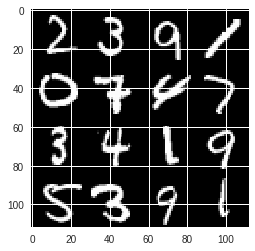

Reconstructed Images


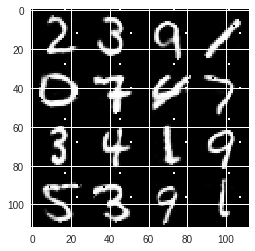

In [0]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Training Parameters
learning_rate = 0.01
num_steps = 300000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()